## Carvana Cars EDA
In this notebook, we'll dig into the data and explore if we can find any intersting patterns of expressions from the data. First, we'll combine the two separate runs of the scraper into one singular dataframe and continue from there.

In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly.express as px
import plotly.offline as po
import plotly.graph_objects as go
import plotly.graph_objs as pg
import time 
import re


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("carvanacars_firstrun.csv")
df2 = pd.read_csv("carvanacars_secondrun.csv")

In [3]:
df1.head()

Unnamed: 0      make          model                         trim    year  \
0          x       Ram  1500 Crew Cab  Big Horn Pickup 4D 5 1/2 ft  2017.0   
1          x  Cadillac            ATS         2.5L Luxury Sedan 4D  2015.0   
2          x     Buick          Regal                     Sedan 4D  2016.0   
3          x    Toyota          Venza                     Wagon 4D  2011.0   
4          x   Hyundai     Elantra GT                 Hatchback 4D  2017.0   

   mileage    price         city state  mpgCity  mpgHighway  \
0  47569.0  31990.0       Winder    GA     17.0        25.0   
1  42722.0  22590.0        Heath    OH     21.0        33.0   
2  48730.0  19990.0   Greenfield    IN     19.0        27.0   
3  95381.0  15990.0     Bessemer    AL     21.0        27.0   
4  65084.0  16590.0  San Antonio    TX     24.0        32.0   

   engineCyclinderCount               engineDesc           fuel driveTrain  \
0                   6.0       V6, VVT, 3.6 Liter  Flexible Fuel        2WD   
1                   4.0         4-Cyl, 2.5 Liter            Gas        RWD   
2                   4.0  4-Cyl, Turbo, 2.0 Liter            Gas        AWD   
3                   4.0         4-Cyl, 2.7 Liter            Gas        FWD   
4                   4.0         4-Cyl, 2.0 Liter            Gas        FWD   

  exteriorColor interiorColor            transmission  numberOfKeys  doors  \
0          Gray          Gray        Automatic, 8-Spd           2.0    4.0   
1        Silver          Gray        Automatic, 6-Spd           2.0    4.0   
2         White         Black        Automatic, 6-Spd           2.0    4.0   
3         White          Gray               Automatic           2.0    4.0   
4           Red         Black  Auto, 6-Spd Shiftronic           1.0    4.0   

   seating  curbWeight                                             facets  \
0      6.0         0.0  [{'facetId': 5, 'facetName': 'Rear View Camera...   
1      5.0      3319.0  [{'facetId': 1, 'facetName': 'Leather Interior...   
2      5.0      3692.0  [{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...   
3      5.0      3945.0  [{'facetId': 1, 'facetName': 'Leather Interior...   
4      5.0      2908.0  [{'facetId': 10, 'facetName': 'Hands Free Call...   

     AC PowerWindows CDPlayer PowerLocks TiltWheel PowerSeats  imperfections  
0  True         True    False       True      True       True            3.0  
1  True         True    False       True      True       True            5.0  
2  True         True     True       True      True       True            4.0  
3  True         True     True       True      True       True            3.0  
4  True         True     True       True      True      False            4.0

In [4]:
df2.head()

Unnamed: 0        make               model                           trim  \
0          x  Land Rover   Range Rover Sport           HSE Sport Utility 4D   
1          x       Buick            LaCrosse             Premium I Sedan 4D   
2          x     Hyundai              Accent                   GLS Sedan 4D   
3          x        Jeep  Wrangler Unlimited       Sport S Sport Utility 4D   
4          x  Volkswagen              Passat  1.8T Limited Edition Sedan 4D   

     year  mileage    price        city state  mpgCity  mpgHighway  \
0  2017.0  45623.0  50590.0  Blue Mound    TX     17.0        23.0   
1  2012.0  32038.0  18990.0     Delanco    NJ     25.0        36.0   
2  2013.0  25253.0  15990.0  Greenfield    IN     28.0        37.0   
3  2020.0  12219.0  44590.0      Winder    GA     17.0        23.0   
4  2015.0  65038.0  17590.0    Bessemer    AL     24.0        36.0   

   engineCyclinderCount                   engineDesc fuel driveTrain  \
0                   6.0  V6, Supercharged, 3.0 Liter  Gas        4WD   
1                   4.0    4-Cyl, eAssist, 2.4 Liter  Gas        FWD   
2                   4.0             4-Cyl, 1.6 Liter  Gas        FWD   
3                   6.0           V6, VVT, 3.6 Liter  Gas        4WD   
4                   4.0      4-Cyl, Turbo, 1.8 Liter  Gas        FWD   

  exteriorColor interiorColor               transmission  numberOfKeys  doors  \
0        Silver         Brown        Auto, 8-Spd CmdShft           2.0    4.0   
1        Silver          Gray      Auto, 6-Spd Shft Ctrl           2.0    4.0   
2         Black          Gray                     Manual           2.0    4.0   
3          Gray         Black              Manual, 6-Spd           2.0    4.0   
4          Gray         Black  Auto, 6-Spd Tiptronic Spt           1.0    4.0   

   seating  curbWeight                                             facets  \
0      5.0      4658.0  [{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...   
1      5.0      3835.0  [{'facetId': 6, 'facetName': 'Heated Seats'}, ...   
2      5.0      2463.0  [{'facetId': 10, 'facetName': 'Hands Free Call...   
3      5.0      4196.0  [{'facetId': 5, 'facetName': 'Rear View Camera...   
4      5.0         0.0  [{'facetId': 10, 'facetName': 'Hands Free Call...   

     AC PowerWindows CDPlayer PowerLocks TiltWheel PowerSeats  imperfections  
0  True         True     True       True      True       True            3.0  
1  True         True     True       True      True       True            4.0  
2  True         True     True       True      True      False            3.0  
3  True         True    False       True      True      False            3.0  
4  True         True     True       True      True       True            5.0

In [5]:
carvana_df = pd.concat([df1, df2], axis=0)
carvana_df.drop(columns=['Unnamed: 0'], inplace=True)
carvana_df.reset_index(inplace=True)
carvana_df.drop_duplicates(keep='first', inplace=True) #to ensure we erase any full duplicates
carvana_df.drop(columns='index', inplace=True)

In [6]:
carvana_df.shape

(12664, 29)

In [7]:
carvana_df.head()

make          model                         trim    year  mileage  \
0       Ram  1500 Crew Cab  Big Horn Pickup 4D 5 1/2 ft  2017.0  47569.0   
1  Cadillac            ATS         2.5L Luxury Sedan 4D  2015.0  42722.0   
2     Buick          Regal                     Sedan 4D  2016.0  48730.0   
3    Toyota          Venza                     Wagon 4D  2011.0  95381.0   
4   Hyundai     Elantra GT                 Hatchback 4D  2017.0  65084.0   

     price         city state  mpgCity  mpgHighway  engineCyclinderCount  \
0  31990.0       Winder    GA     17.0        25.0                   6.0   
1  22590.0        Heath    OH     21.0        33.0                   4.0   
2  19990.0   Greenfield    IN     19.0        27.0                   4.0   
3  15990.0     Bessemer    AL     21.0        27.0                   4.0   
4  16590.0  San Antonio    TX     24.0        32.0                   4.0   

                engineDesc           fuel driveTrain exteriorColor  \
0       V6, VVT, 3.6 Liter  Flexible Fuel        2WD          Gray   
1         4-Cyl, 2.5 Liter            Gas        RWD        Silver   
2  4-Cyl, Turbo, 2.0 Liter            Gas        AWD         White   
3         4-Cyl, 2.7 Liter            Gas        FWD         White   
4         4-Cyl, 2.0 Liter            Gas        FWD           Red   

  interiorColor            transmission  numberOfKeys  doors  seating  \
0          Gray        Automatic, 8-Spd           2.0    4.0      6.0   
1          Gray        Automatic, 6-Spd           2.0    4.0      5.0   
2         Black        Automatic, 6-Spd           2.0    4.0      5.0   
3          Gray               Automatic           2.0    4.0      5.0   
4         Black  Auto, 6-Spd Shiftronic           1.0    4.0      5.0   

   curbWeight                                             facets    AC  \
0         0.0  [{'facetId': 5, 'facetName': 'Rear View Camera...  True   
1      3319.0  [{'facetId': 1, 'facetName': 'Leather Interior...  True   
2      3692.0  [{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...  True   
3      3945.0  [{'facetId': 1, 'facetName': 'Leather Interior...  True   
4      2908.0  [{'facetId': 10, 'facetName': 'Hands Free Call...  True   

  PowerWindows CDPlayer PowerLocks TiltWheel PowerSeats  imperfections  
0         True    False       True      True       True            3.0  
1         True    False       True      True       True            5.0  
2         True     True       True      True       True            4.0  
3         True     True       True      True       True            3.0  
4         True     True       True      True      False            4.0

In [8]:
carvana_df.tail()

make              model                   trim    year  mileage  \
12659     Kia               Soul             S Wagon 4D  2020.0  45896.0   
12660  Toyota            Sequoia   SR5 Sport Utility 4D  2019.0  64417.0   
12661    Ford             Fiesta        SE Hatchback 4D  2019.0  53697.0   
12662  Toyota              Camry           XSE Sedan 4D  2022.0   2832.0   
12663  Nissan  Frontier Crew Cab  PRO-4X Pickup 4D 5 ft  2022.0   3488.0   

         price          city state  mpgCity  mpgHighway  engineCyclinderCount  \
12659  20100.0      Manville    NJ     27.0        33.0                   4.0   
12660  41700.0      Manville    NJ     13.0        17.0                   8.0   
12661  15297.0      Chamblee    GA     27.0        35.0                   4.0   
12662  41590.0  West Memphis    AR     27.0        38.0                   4.0   
12663  48990.0        Winder    GA     17.0        22.0                   6.0   

             engineDesc fuel driveTrain exteriorColor interiorColor  \
12659  4-Cyl, 2.0 Liter  Gas        FWD         Black         Black   
12660     V8, 5.7 Liter  Gas        4WD         White           NaN   
12661  4-Cyl, 1.6 Liter  Gas        FWD        Silver           NaN   
12662  4-Cyl, 2.5 Liter  Gas        FWD         White         Black   
12663     V6, 3.8 Liter  Gas        4WD          Blue         Black   

                              transmission  numberOfKeys  doors  seating  \
12659                      Automatic, i-VT           1.0    4.0      5.0   
12660  Automatic, 6-Spd w/Sequential Shift           2.0    4.0      8.0   
12661                        Manual, 5-Spd           1.0    4.0      5.0   
12662  Automatic, 8-Spd w/Sequential Shift           2.0    4.0      5.0   
12663                     Automatic, 9-Spd           2.0    4.0      5.0   

       curbWeight                                             facets    AC  \
12659      2844.0  [{'facetId': 5, 'facetName': 'Rear View Camera...  True   
12660      5985.0  [{'facetId': 2, 'facetName': 'Third Row Seat'}...  True   
12661      2537.0  [{'facetId': 5, 'facetName': 'Rear View Camera...  True   
12662      3425.0  [{'facetId': 1, 'facetName': 'Leather Interior...  True   
12663         0.0  [{'facetId': 4, 'facetName': 'Navigation'}, {'...  True   

      PowerWindows CDPlayer PowerLocks TiltWheel PowerSeats  imperfections  
12659         True     True       True      True      False            8.0  
12660         True     True       True      True       True            0.0  
12661         True     True       True      True      False           14.0  
12662         True    False       True      True       True            3.0  
12663         True    False       True      True       True            3.0

Now that we have one dataframe assured that there are no full duplicates, we can start to explore our data. Let's first look at summary statistics, as well as missing value counts since we know there are some scattered throughout the data.

In [9]:
carvana_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 0 to 12663
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  12660 non-null  object 
 1   model                 12660 non-null  object 
 2   trim                  12660 non-null  object 
 3   year                  12660 non-null  float64
 4   mileage               12660 non-null  float64
 5   price                 12660 non-null  float64
 6   city                  12660 non-null  object 
 7   state                 12660 non-null  object 
 8   mpgCity               12268 non-null  float64
 9   mpgHighway            12269 non-null  float64
 10  engineCyclinderCount  12636 non-null  float64
 11  engineDesc            12660 non-null  object 
 12  fuel                  12658 non-null  object 
 13  driveTrain            12660 non-null  object 
 14  exteriorColor         12660 non-null  object 
 15  interiorColor      

We don't have too many missing values so far as to impute anything before EDA.

In [10]:
carvana_df.describe()

year        mileage          price       mpgCity    mpgHighway  \
count  12660.000000   12660.000000   12660.000000  12268.000000  12269.000000   
mean    2016.603160   51994.817694   24597.964455     23.031790     30.983699   
std        2.571027   25878.853529    9276.790962      4.597695      5.422278   
min     2009.000000       1.000000   10990.000000     11.000000     16.000000   
25%     2015.000000   31965.500000   18590.000000     20.000000     27.000000   
50%     2017.000000   50822.500000   21590.000000     23.000000     31.000000   
75%     2019.000000   71846.750000   26990.000000     26.000000     36.000000   
max     2022.000000  113125.000000  105990.000000     54.000000     50.000000   

       engineCyclinderCount  numberOfKeys         doors       seating  \
count          12636.000000  12660.000000  12659.000000  12656.000000   
mean               4.627493      1.691706      3.907576      5.161820   
std                1.116116      0.484186      0.417831      0.779356   
min                0.000000      1.000000      2.000000      2.000000   
25%                4.000000      1.000000      4.000000      5.000000   
50%                4.000000      2.000000      4.000000      5.000000   
75%                6.000000      2.000000      4.000000      5.000000   
max                8.000000      4.000000      5.000000      8.000000   

         curbWeight  imperfections  
count  12660.000000   12641.000000  
mean    3171.130095       3.252274  
std     1278.062847       1.035925  
min        0.000000       0.000000  
25%     2855.000000       3.000000  
50%     3327.000000       3.000000  
75%     3909.000000       4.000000  
max     7470.000000      15.000000

In [11]:
#Made a small typo in one attribute I will correct here:
carvana_df.rename(columns={"engineCyclinderCount": "engineCylinderCount"}, inplace=True)

It's interesting we have a car(s) somewhere that has 54 MPG city, which is higher than the max counterpart for highway. We'll have to investigate that record.

In [12]:
carvana_df[carvana_df['mpgCity']>=50]

make    model                  trim    year   mileage    price  \
3964   Toyota  Prius c    Three Hatchback 4D  2013.0   96542.0  15990.0   
4214   Toyota    Prius      Two Hatchback 4D  2012.0   33675.0  21990.0   
6134   Toyota    Prius    Three Hatchback 4D  2013.0   93806.0  18590.0   
6579   Toyota    Prius      Two Hatchback 4D  2014.0   99771.0  17990.0   
7016   Toyota    Prius     Four Hatchback 4D  2013.0   84965.0  18990.0   
7106   Toyota    Prius      Two Hatchback 4D  2017.0   98289.0  22590.0   
7736   Toyota    Prius    Three Hatchback 4D  2013.0   66498.0  19990.0   
8300   Toyota    Prius      Two Hatchback 4D  2014.0   82334.0  18990.0   
8359   Toyota    Prius    Three Hatchback 4D  2013.0   50384.0  19990.0   
8693   Toyota    Prius      Two Hatchback 4D  2012.0   97513.0  17590.0   
8698   Toyota    Prius     Four Hatchback 4D  2011.0   60337.0  19990.0   
8841   Toyota    Prius      Two Hatchback 4D  2015.0   47414.0  23590.0   
8893   Toyota    Prius      Two Hatchback 4D  2011.0   48436.0  20990.0   
9272   Toyota    Prius     Four Hatchback 4D  2013.0   48706.0  22590.0   
9301   Toyota    Prius      Two Hatchback 4D  2013.0   58436.0  20590.0   
9351   Toyota    Prius      Two Hatchback 4D  2014.0  104540.0  17990.0   
9411   Toyota    Prius     Four Hatchback 4D  2011.0   91648.0  17990.0   
9905   Toyota    Prius    Three Hatchback 4D  2015.0   39591.0  23990.0   
10055  Toyota    Prius      Two Hatchback 4D  2012.0   82084.0  17990.0   
10262  Toyota    Prius      Two Hatchback 4D  2011.0   68169.0  18990.0   
10786  Toyota    Prius      Two Hatchback 4D  2015.0   76047.0  20990.0   
10883  Toyota    Prius      Two Hatchback 4D  2012.0   92899.0  17590.0   
11382  Toyota    Prius    Three Hatchback 4D  2013.0   39437.0  22990.0   
11422  Toyota    Prius      Two Hatchback 4D  2015.0   92715.0  26990.0   
11859  Toyota    Prius      Two Hatchback 4D  2015.0   52612.0  23990.0   
11885  Toyota    Prius      Two Hatchback 4D  2013.0   42511.0  20990.0   
12122  Toyota    Prius  Two Eco Hatchback 4D  2016.0   78574.0  23990.0   
12159  Toyota    Prius      Two Hatchback 4D  2015.0   55441.0  23590.0   
12444  Toyota    Prius    Three Hatchback 4D  2013.0   75770.0  20590.0   
12509  Toyota    Prius      Two Hatchback 4D  2016.0   65595.0  23990.0   

                city state  mpgCity  mpgHighway  engineCylinderCount  \
3964          Winder    GA     53.0        46.0                  4.0   
4214      Greenfield    IN     51.0        48.0                  4.0   
6134    West Memphis    AR     51.0        48.0                  4.0   
6579     Haines City    FL     51.0        48.0                  4.0   
7016         Trenton    OH     51.0        48.0                  4.0   
7106    West Memphis    AR     54.0        50.0                  4.0   
7736      Greenfield    IN     51.0        48.0                  4.0   
8300        Bessemer    AL     51.0        48.0                  4.0   
8359      Greenfield    IN     51.0        48.0                  4.0   
8693      Greenfield    IN     51.0        48.0                  4.0   
8698     Haines City    FL     51.0        48.0                  4.0   
8841        Bessemer    AL     51.0        48.0                  4.0   
8893   Oklahoma City    OK     51.0        48.0                  4.0   
9272      Greenfield    IN     51.0        48.0                  4.0   
9301         Concord    NC     51.0        48.0                  4.0   
9351      Greenfield    IN     51.0        48.0                  4.0   
9411      Greenfield    IN     51.0        48.0                  4.0   
9905        Bessemer    AL     51.0        48.0                  4.0   
10055     Greenfield    IN     51.0        48.0                  4.0   
10262     Greenfield    IN     51.0        48.0                  4.0   
10786        Delanco    NJ     51.0        48.0                  4.0   
10883    Haines City    FL     51.0        48.0                  4.0   
11382    Haines City    FL 

We now know what the most fuel efficient car is now according to this data being the Toyota Prius. If we look at the fuel type for those cars, they are almost all hybrid fuel types.

As always with EDA, let's start asking some questions about the data.

<b>What is the distribution of the Year for the cars? Also, what is the Year to Price correlation</b>

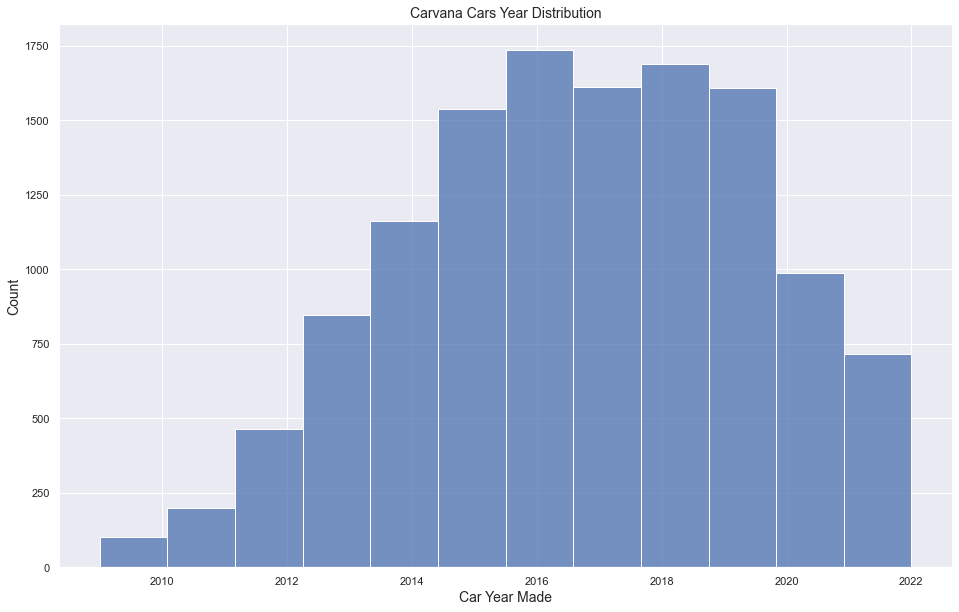

In [13]:
plt.figure(figsize=(16, 10))
sns.histplot(data=carvana_df, x='year', bins=12)
plt.title("Carvana Cars Year Distribution", fontsize=14)
plt.xlabel("Car Year Made", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

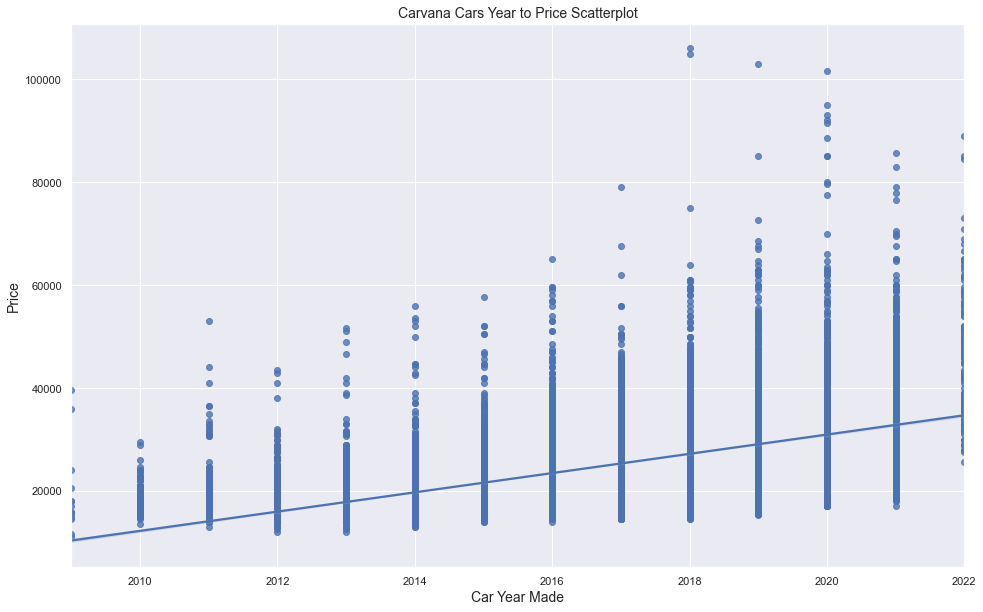

In [14]:
plt.figure(figsize=(16, 10))
sns.regplot(data=carvana_df, x='year', y='price')
plt.title("Carvana Cars Year to Price Scatterplot", fontsize=14)
plt.xlabel("Car Year Made", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.show()

We can all of the cars in this dataset that Carvana sells are cars made within the last 14 or so years. Also, as we expect, the price generally increases the newer the car model is.

Now to get a sense of the price distribution, let's look at the <b>histogram of prices.</b>

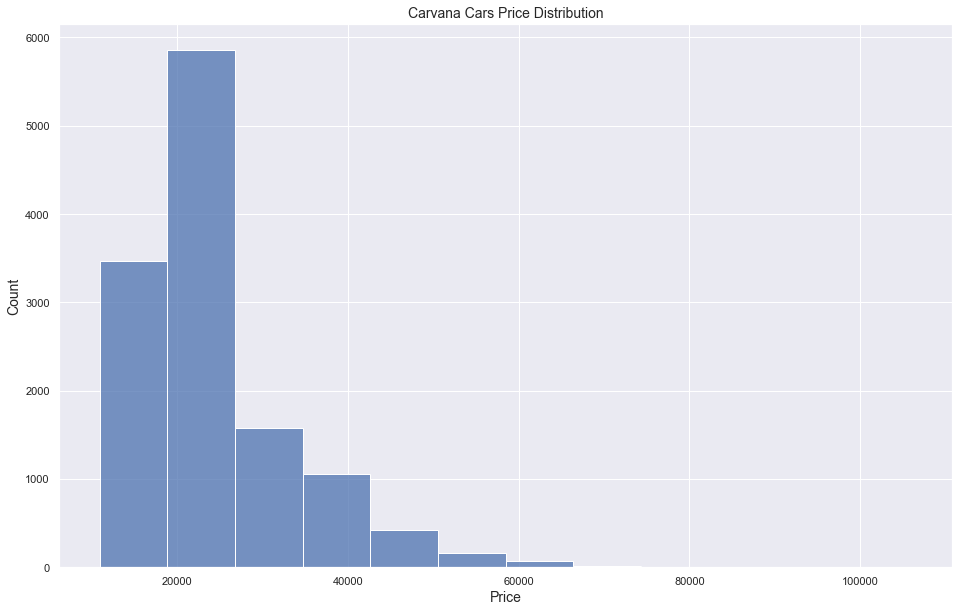

In [15]:
plt.figure(figsize=(16, 10))
sns.histplot(data=carvana_df, x='price', bins=12)
plt.title("Carvana Cars Price Distribution", fontsize=14)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Let's also take a look at the <b>distribution of the mileages of cars.</b>

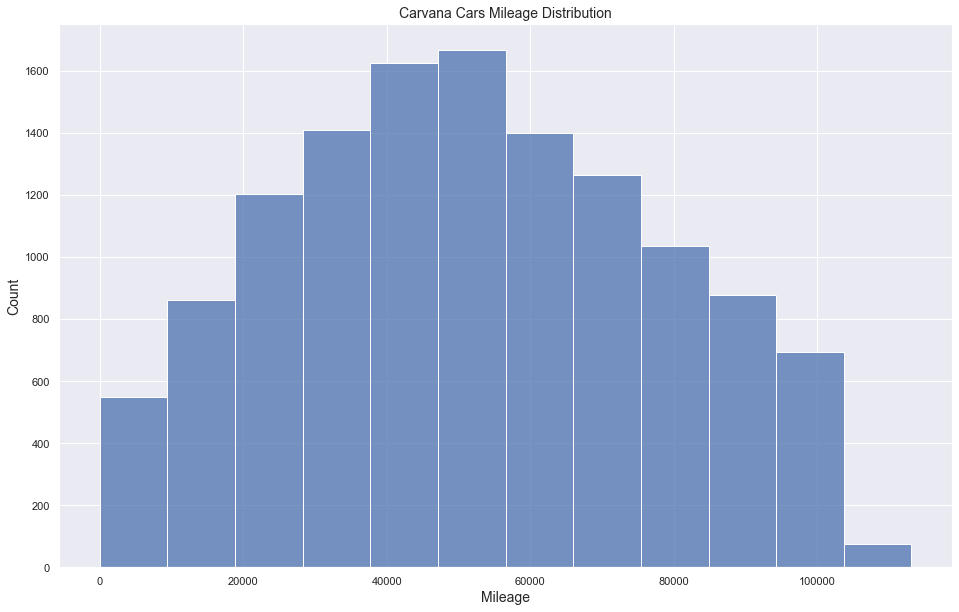

In [16]:
plt.figure(figsize=(16, 10))
sns.histplot(data=carvana_df, x='mileage', bins=12)
plt.title("Carvana Cars Mileage Distribution", fontsize=14)
plt.xlabel("Mileage", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

We have a fairly normally distribution for the mileages of cars.

It's good to make note of our distribution of the target variable now. We have positive skewness here with some outliers. These outliers are cars in the 80k-100k range. Let's take a glimpse of what those cars are.

In [17]:
carvana_df[carvana_df['price']>=80000]

make                       model  \
666        Chevrolet                    Corvette   
2742      Land Rover           Range Rover Sport   
3330   Mercedes-Benz        Mercedes-AMG S-Class   
3546   Mercedes-Benz                          SL   
4250             BMW                          X7   
6016   Mercedes-Benz             Mercedes-AMG GT   
7215           Lexus                          LS   
7913      Land Rover           Range Rover Sport   
8917            Jeep                    Wagoneer   
9488           Dodge                  Challenger   
9839       Chevrolet  Silverado 3500 HD Crew Cab   
10081          Tesla                     Model X   
10340        Porsche                     Cayenne   
11192     Land Rover                 Range Rover   
11219     Land Rover                Defender 110   
11432        Porsche                         911   
12632        Porsche                     Cayenne   

                                      trim    year  mileage     price  \
666                      Stingray Coupe 2D  2020.0   3651.0   91590.0   
2742                  HST Sport Utility 4D  2020.0  21572.0   84990.0   
3330                     S 63 AMG Sedan 4D  2018.0  33418.0  104990.0   
3546                    SL 450 Roadster 2D  2020.0   5087.0   88590.0   
4250                 M50i Sport Utility 4D  2020.0  22113.0   94990.0   
6016                           53 Sedan 4D  2020.0  31632.0  101590.0   
7215               LS 500 F SPORT Sedan 4D  2022.0   1689.0   88990.0   
7913   HSE Silver Edition Sport Utility 4D  2021.0  19572.0   85590.0   
8917           Series III Sport Utility 4D  2022.0   5425.0   84590.0   
9488         SRT Hellcat Widebody Coupe 2D  2021.0   1633.0   82990.0   
9839       High Country Pickup 4D 6 1/2 ft  2022.0   3310.0   84990.0   
10081               P100D Sport Utility 4D  2019.0  25194.0  102990.0   
10340            E-Hybrid Sport Utility 4D  2020.0  11749.0   91990.0   
11192            P400 HSE Sport Utility 4D  2020.0  26430.0   92990.0   
11219       First Edition Sport Utility 4D  2020.0  23719.0   84990.0   
11432                 Carrera Cabriolet 2D  2018.0   4446.0  105990.0   
12632            E-Hybrid Sport Utility 4D  2019.0  12038.0   84990.0   

               city state  mpgCity  mpgHighway  engineCylinderCount  \
666    West Memphis    AR     15.0        27.0                  8.0   
2742        Lebanon    TN      NaN         NaN                  6.0   
3330         Winder    GA     15.0        23.0                  8.0   
3546   West Memphis    AR     20.0        28.0                  6.0   
4250        Concord    NC     15.0        21.0                  8.0   
6016          Heath    OH     19.0        24.0                  6.0   
7215   West Memphis    AR     18.0        29.0                  6.0   
7913       Tolleson    AZ     22.0        28.0                  6.0   
8917   West Memphis    AR     15.0        20.0                  8.0   
9488        Lebanon    TN     13.0        21.0                  8.0   
9839        Trenton    OH      NaN         NaN                  8.0   
10081  West Memphis    AR      NaN         NaN                  NaN   
10340       Concord    NC      NaN         NaN                  6.0   
11192       Concord    NC     19.0        24.0                  6.0   
11219    Greenfield    IN     17.0        22.0                  6.0   
11432       Lebanon    TN     22.0        28.0                  6.0   
12632       Concord    NC      NaN         NaN                  6.0   

                                           engineDesc      fuel driveTrain  \
666                                     V8, 6.2 Liter       Gas        RWD   
2742                          6-Cyl, Turbo, 3.0 Liter       Gas        AWD   
3330                        V8, Twin Turbo, 4.0 Liter       Gas        AWD   
3546                        V6, Twin Turbo, 3.0 Liter       Gas        RWD   
4250                        V8, Twin Turbo, 4.4 Liter       Gas        AWD   
6016             

There aren't very many considering the size of our dataset. The cars in this price range are to no surprise the higher end car brands priamrily such as Porsche and some Range Rovers. We also have one Corvette that is >= $80,000 in our dataset here.

I noticed the city and state seem to be consistent across records, which means that these locations are conspicuously the Carvana retailer locations across the United States. 

So, <b>what are the average car prices per Carvana retailer state location?</b>

In [18]:
price_by_city_state = carvana_df.groupby('state').agg({'price':'mean'})

In [19]:
price_by_city_state.reset_index(inplace=True)

In [20]:
carvana_df.state.value_counts()

IN    2935
OH    1688
NC    1479
FL    1372
AR    1315
GA    1067
AL    1028
NJ     573
TN     485
TX     475
OK     176
AZ      23
NY      22
UT       4
IL       3
MN       3
VA       2
NV       2
PA       2
MD       1
CA       1
MI       1
MA       1
CT       1
WI       1
Name: state, dtype: int64

In [21]:
data = dict(type = 'choropleth', 
            locations = price_by_city_state['state'], 
            locationmode = 'USA-states', 
            z = price_by_city_state['price'], 
            text = price_by_city_state['state'], 
            colorscale = 'Greens', 
            colorbar = {'title' : 'Average Car Price'})
layout = dict(title = 'Carvana Used Car Price Averages per Retailer State', 
              geo = dict(scope='usa' , 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)'))
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)

#Helpful reference for making a geo graph
#https://towardsdatascience.com/geographical-plotting-of-maps-with-plotly-4b5a5c95f02a

It appears that Illinois has the most highest average of car prices. Many of the higher average prices seem to be concentrated in the Northeast. However, we do have some large variation in terms of how many cars are in each state within our dataset.

Next, let's get a good understanding of make for the vehicle we look at view the <b>distributions of the price of cars for each make/brand.</b>

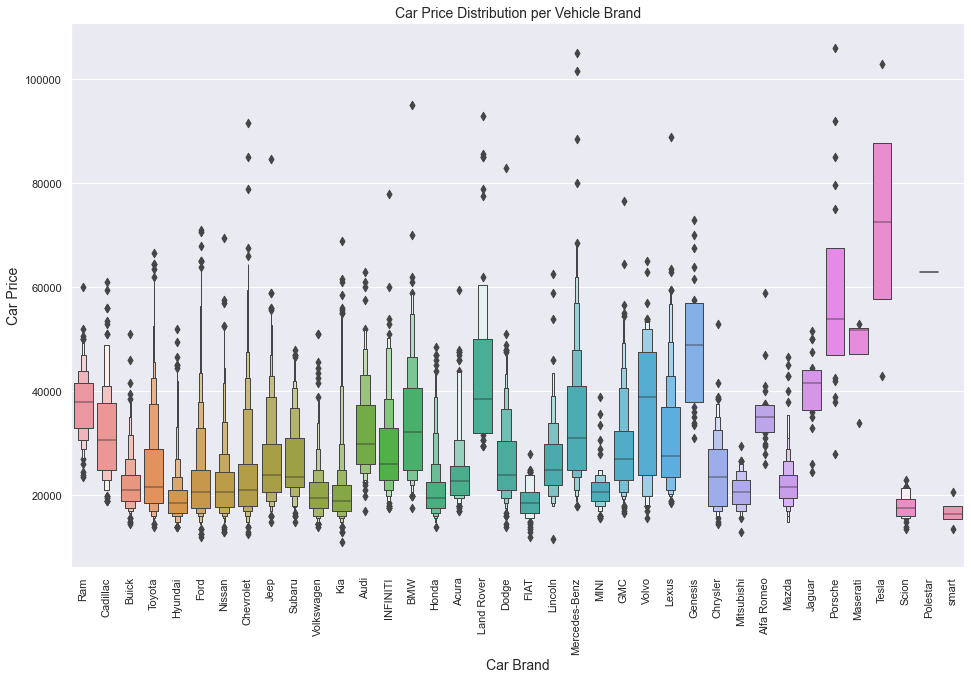

In [22]:
plt.figure(figsize=(16,10))
ax = sns.boxenplot(x="make", y="price", data=carvana_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Car Price Distribution per Vehicle Brand", fontsize=14)
ax.set_xlabel("Car Brand", fontsize=14)
ax.set_ylabel("Car Price", fontsize=14)
plt.show()

We have plently of makes in our data, which may make modeling more difficult and we'll have to handle this attribute with care. Many makes have generally the same price range, while Porsche and Tesla have much higher average car prices.

Another obvious question we can knock out is <b>how does car mileage correlate with car price?</b>

In [23]:
chosen_makes = ['Land Rover', 'Audi', 'Honda', 'Ford']
fig = px.scatter(carvana_df.dropna(axis=0)[carvana_df['make'].isin(chosen_makes)], x="mileage", y="price", color="make", facet_col="make",
                 trendline="ols", title="Car Mileage vs. Price Scatterplot", width=1000)


fig.show()

Since we have very many vehicle brands, plotting all of them like so using plotly would result in an inappropriate graph. 

An easy observation we can make from plotting some sample brands with their mileage to price correlations is that cars depreciate as their mileages increase. Also, some brands have inherently higher prices, for example Land Rover versus Ford. We do have many more records for Ford as well, however.

Another interesting attribute we can investigate is <b>price versus the number of imperfections.</b> An imperfection can be, for example, a small dent or scratch in the car or deficiency. We can see if there are any key differences in price by making this chart.

In [24]:
fig = px.scatter(carvana_df.dropna(axis=0), x="imperfections", y="price", 
                 trendline="ols", title="Imperfections vs. Price Scatterplot", width=1000)

fig.show()

We do have some wide variation in the left half of the records, as well as not as many instances with higher numbers of imperfections. Though, we can see as the number of imperfections increase, the trend in how high a car can be priced decreases.

We can see that even if a car has just a few imperfections to it, it can still be priced similarly to a car without any imperfections listed. Any car with more than 3 imperfections will generally achieve a lower price.

Next, <b>does fuel type influence the price of a vehicle?</b>

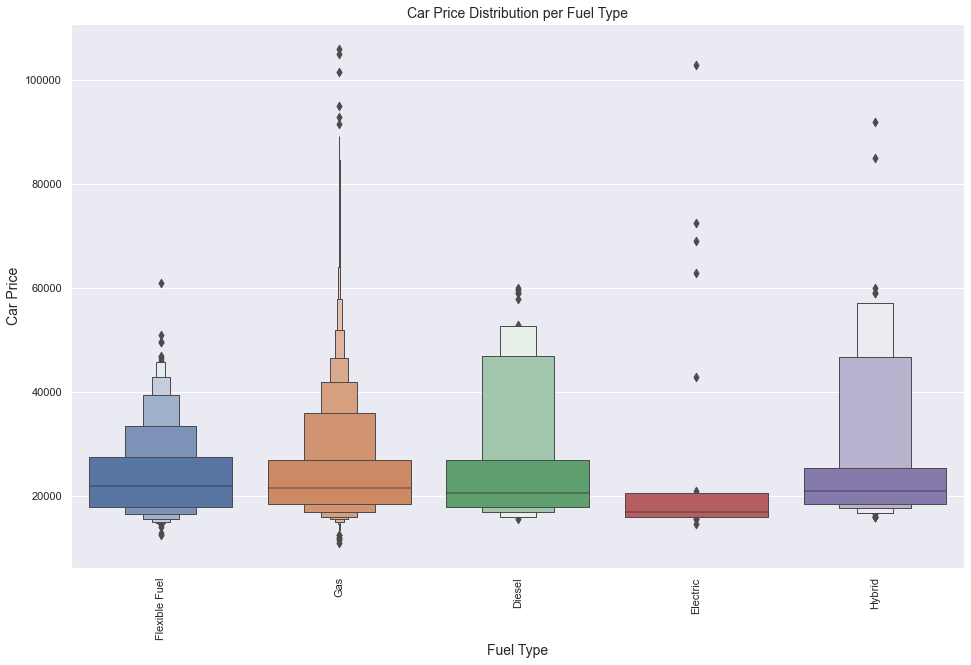

In [200]:
plt.figure(figsize=(16,10))
ax = sns.boxenplot(x="fuel", y="price", data=carvana_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Car Price Distribution per Fuel Type", fontsize=14)
ax.set_xlabel("Fuel Type", fontsize=14)
ax.set_ylabel("Car Price", fontsize=14)
plt.show()

At the time of writing this, there is an increasing consensus on the importance of alternative sources of energy and fuel for cars and airplanes. All of the fuel types with the exception of electric have similar price ranges. While there aren't nearly as many records of electric cars versus the extremely abundant amount of records for gas, electric cars are generally a cheaper option, and can also circumvent expensive gas prices.

How about <b>price distributions among exterior and interior colors?</b>

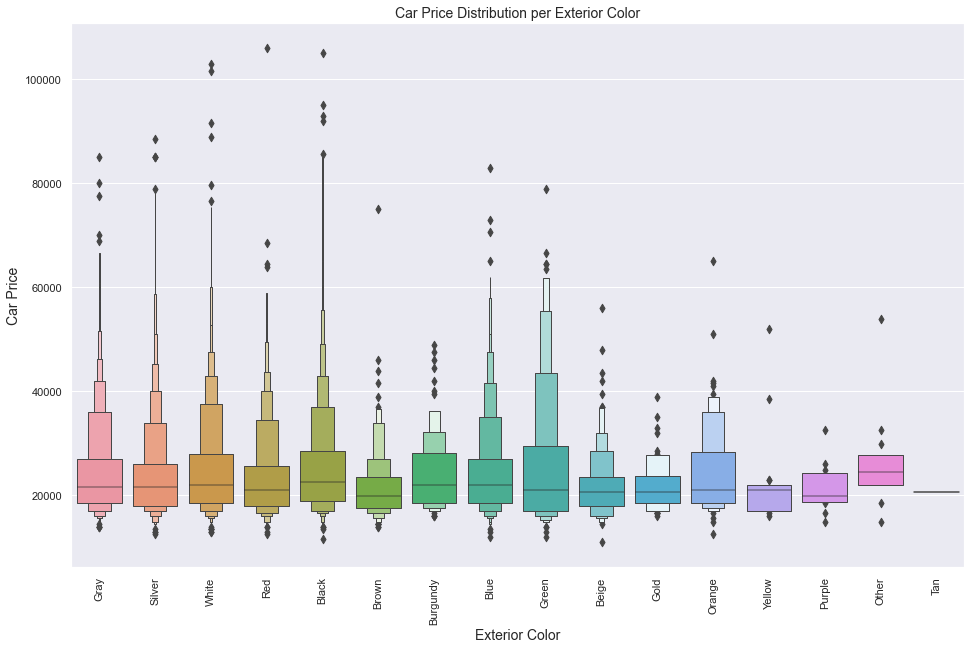

In [201]:
plt.figure(figsize=(16,10))
ax = sns.boxenplot(x="exteriorColor", y="price", data=carvana_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Car Price Distribution per Exterior Color", fontsize=14)
ax.set_xlabel("Exterior Color", fontsize=14)
ax.set_ylabel("Car Price", fontsize=14)
plt.show()

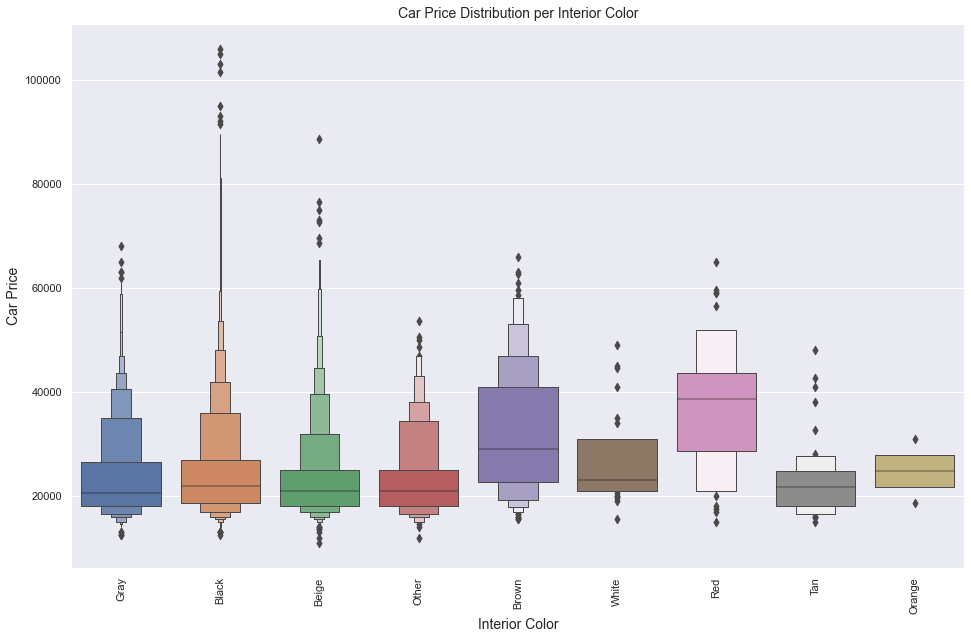

In [202]:
plt.figure(figsize=(16,10))
ax = sns.boxenplot(x="interiorColor", y="price", data=carvana_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title("Car Price Distribution per Interior Color", fontsize=14)
ax.set_xlabel("Interior Color", fontsize=14)
ax.set_ylabel("Car Price", fontsize=14)
plt.show()

In [203]:
carvana_df.groupby(['exteriorColor', 'interiorColor']).agg({'price':'mean'}).sort_values(by='price', ascending=False)[:15]

price
exteriorColor interiorColor              
Blue          Red            59590.000000
Silver        Red            44290.000000
Black         Red            42215.000000
Green         Brown          39640.000000
Blue          Brown          37553.636364
Gray          Red            37328.461538
Silver        Brown          37070.000000
Gray          White          36390.000000
Blue          White          36090.000000
White         Red            35256.666667
Red           Red            34990.000000
Gray          Brown          33312.222222
White         Brown          32948.730159
Black         Brown          31912.222222
              Orange         30990.000000

On their own, the price ranges for individual colors, whether exterior or interior, are similar. When looking at combinations, however, we can see red, brown, and white interiors are generally more expensive. For the most expensive combinations in this table, these records are probably sparse and come from a particular make and model.

Since a red interior is generally quite expensive, <b>what cars have a red interior?</b>

In [204]:
carvana_df[carvana_df['interiorColor']=='Red'].loc[:, 'make'].value_counts()

Lexus            16
Mercedes-Benz     3
Dodge             3
Acura             3
Mazda             3
FIAT              2
Volvo             2
Kia               1
Ford              1
Mitsubishi        1
BMW               1
Toyota            1
Jeep              1
Nissan            1
INFINITI          1
Alfa Romeo        1
Name: make, dtype: int64

Primarily, Lexus cars have red interiors. We'll have to keep on eye on the color attributes to see if they are statistically significant later on when transforming the data.

Let's next take a look and <b>see if MPG is highly infleuntial to the price per make.</b>

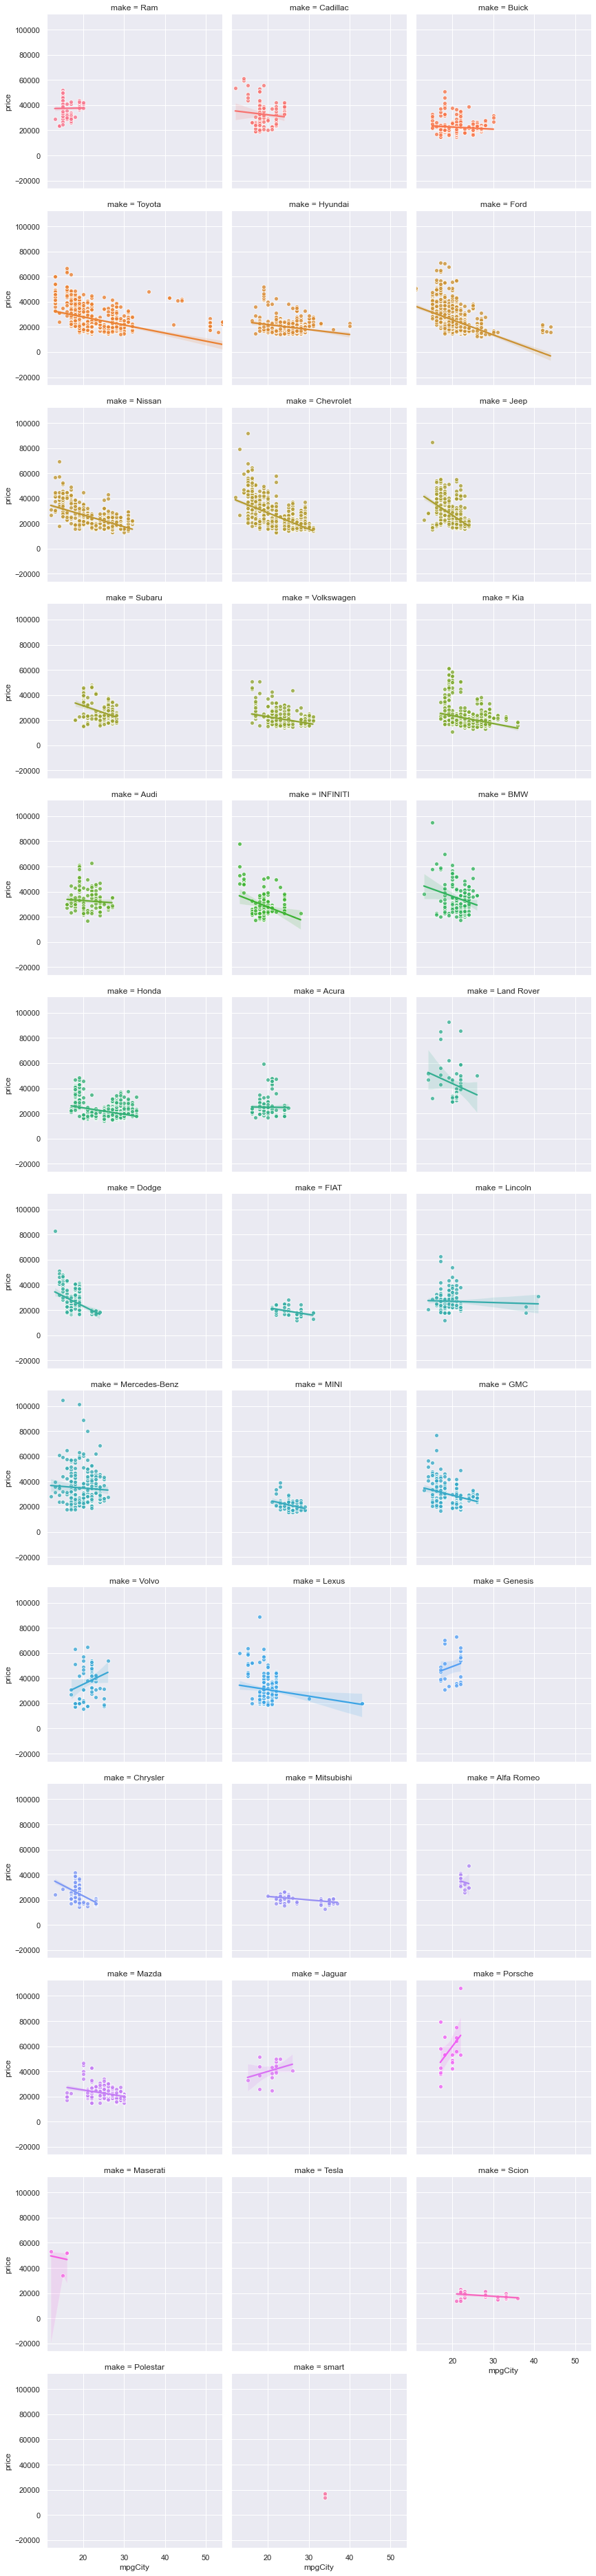

In [209]:
sns.lmplot(x='mpgCity', y="price", hue="make", col="make",
           data=carvana_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4)
plt.show()

Not many of the makes correlate in different magnitudes. Also, since we already have so many different makes, it would only be cumbersome to engineer features out of attributes that already have such high cardinality.

Let's try <b>fuel and drive train</b> instead.

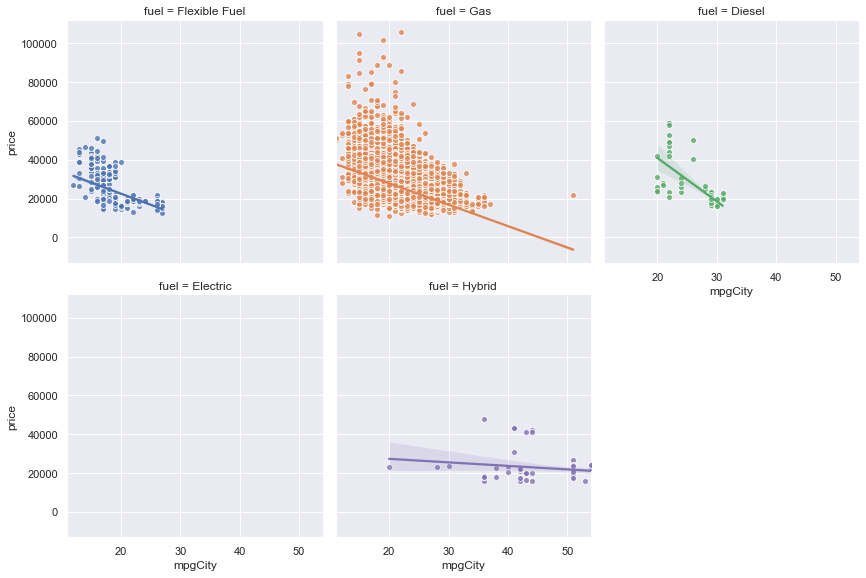

In [210]:
sns.lmplot(x='mpgCity', y="price", hue="fuel", col="fuel",
           data=carvana_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4)
plt.show()

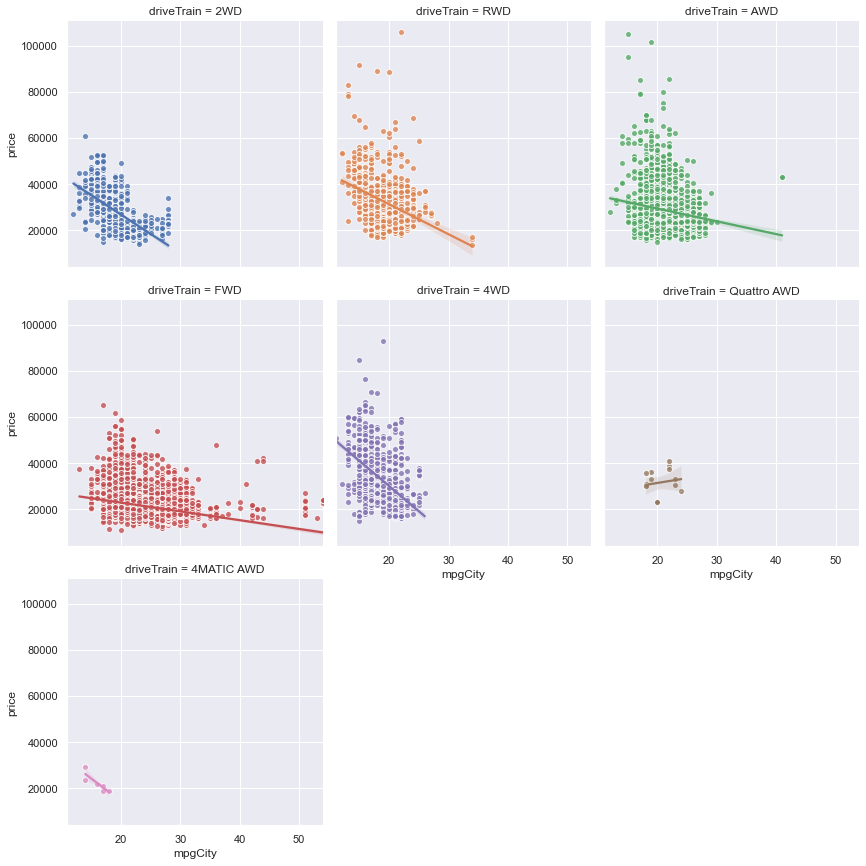

In [211]:
sns.lmplot(x='mpgCity', y="price", hue="driveTrain", col="driveTrain",
           data=carvana_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4)
plt.show()

It seems we have similar trends for fuel type as well.

Now, let's analyze <b>engine cylinder count infleunce on MPG and price.</b>

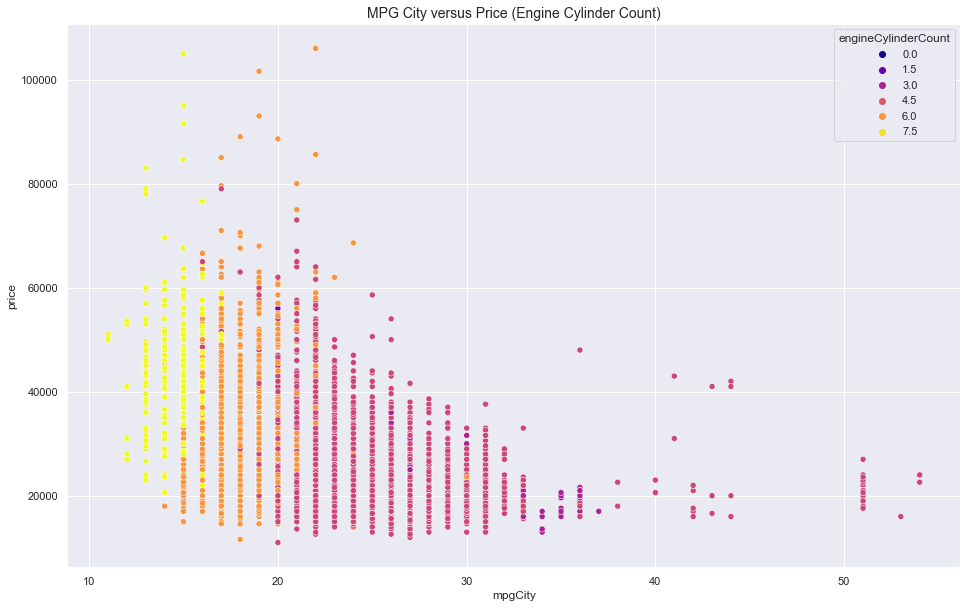

In [236]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=carvana_df, x="mpgCity", y="price", hue="engineCylinderCount", palette="plasma")
plt.title("MPG City versus Price (Engine Cylinder Count)", fontsize=14)
plt.show()

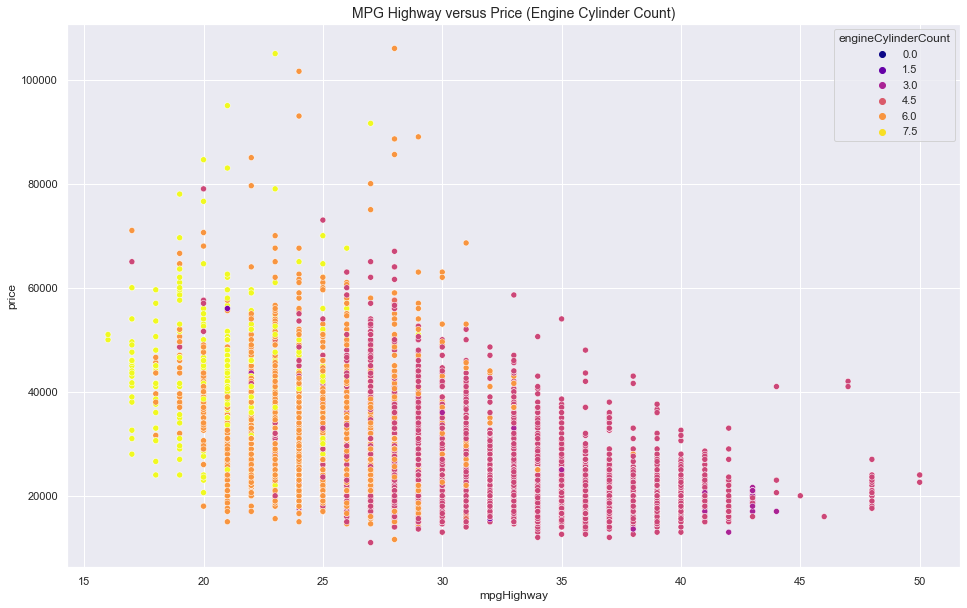

In [237]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=carvana_df, x="mpgHighway", y="price", hue="engineCylinderCount", palette="plasma")
plt.title("MPG Highway versus Price (Engine Cylinder Count)", fontsize=14)
plt.show()

<Figure size 1152x720 with 0 Axes>

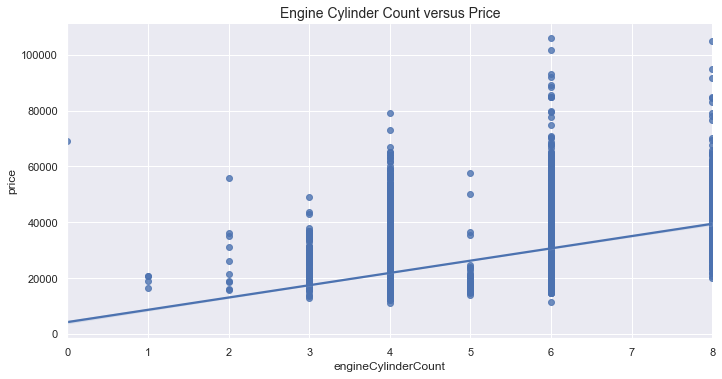

In [222]:
plt.figure(figsize=(16,10))
g = sns.lmplot(data=carvana_df, x="engineCylinderCount", y="price", height=5, aspect=2)
plt.title("Engine Cylinder Count versus Price", fontsize=14)
plt.show()

In immediate observation we can make from these graphs is that generally the higher the engine cylinder count, the less fuel efficient the car is. There reaches a point where the count finds an optimal value as far as fuel efficiency. 

What's interesting is that these cars with higher engine cylinder counts are less fuel efficient, yet are more expensive.

Every car has unique facets that are included with their information. Let's next investigate those now and see if we can point out any common values.

In [239]:
carvana_df['facets'].value_counts()

[{'facetId': 5, 'facetName': 'Rear View Camera'}, {'facetId': 10, 'facetName': 'Hands Free Calling'}, {'facetId': 11, 'facetName': 'Bluetooth Music'}, {'facetId': 25, 'facetName': 'Alloy Wheels'}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       318
[{'facetId': 5, 'facetName': 'Rear View Camera'}, {'facetId': 10, 'facetName': 'Hands Free Calling'}, {'facetId': 25, 'facetName': 'Alloy Wheels'}]      

We don't want to take out too many possible facets as we don't want to unnecessarily increase our dimensions. For now, we can mark down <i>Bluetooth</i> and <i>Rear View Camera</i> as facets more modern that could drive a car's price.

In [240]:
carvana_df.head()

make          model                         trim    year  mileage  \
0       Ram  1500 Crew Cab  Big Horn Pickup 4D 5 1/2 ft  2017.0  47569.0   
1  Cadillac            ATS         2.5L Luxury Sedan 4D  2015.0  42722.0   
2     Buick          Regal                     Sedan 4D  2016.0  48730.0   
3    Toyota          Venza                     Wagon 4D  2011.0  95381.0   
4   Hyundai     Elantra GT                 Hatchback 4D  2017.0  65084.0   

     price         city state  mpgCity  mpgHighway  engineCylinderCount  \
0  31990.0       Winder    GA     17.0        25.0                  6.0   
1  22590.0        Heath    OH     21.0        33.0                  4.0   
2  19990.0   Greenfield    IN     19.0        27.0                  4.0   
3  15990.0     Bessemer    AL     21.0        27.0                  4.0   
4  16590.0  San Antonio    TX     24.0        32.0                  4.0   

                engineDesc           fuel driveTrain exteriorColor  \
0       V6, VVT, 3.6 Liter  Flexible Fuel        2WD          Gray   
1         4-Cyl, 2.5 Liter            Gas        RWD        Silver   
2  4-Cyl, Turbo, 2.0 Liter            Gas        AWD         White   
3         4-Cyl, 2.7 Liter            Gas        FWD         White   
4         4-Cyl, 2.0 Liter            Gas        FWD           Red   

  interiorColor            transmission  numberOfKeys  doors  seating  \
0          Gray        Automatic, 8-Spd           2.0    4.0      6.0   
1          Gray        Automatic, 6-Spd           2.0    4.0      5.0   
2         Black        Automatic, 6-Spd           2.0    4.0      5.0   
3          Gray               Automatic           2.0    4.0      5.0   
4         Black  Auto, 6-Spd Shiftronic           1.0    4.0      5.0   

   curbWeight                                             facets    AC  \
0         0.0  [{'facetId': 5, 'facetName': 'Rear View Camera...  True   
1      3319.0  [{'facetId': 1, 'facetName': 'Leather Interior...  True   
2      3692.0  [{'facetId': 3, 'facetName': 'Sunroof'}, {'fac...  True   
3      3945.0  [{'facetId': 1, 'facetName': 'Leather Interior...  True   
4      2908.0  [{'facetId': 10, 'facetName': 'Hands Free Call...  True   

  PowerWindows CDPlayer PowerLocks TiltWheel PowerSeats  imperfections  
0         True    False       True      True       True            3.0  
1         True    False       True      True       True            5.0  
2         True     True       True      True       True            4.0  
3         True     True       True      True       True            3.0  
4         True     True       True      True      False            4.0

Many of the remaining columns have very high cardinality, and we will likely have to engineer those features into lower cardinality if possible.

## Closing Remarks/Observations:
* The distribution of prices of vehicles has some positive skewness. We will need to account for this during model construction.


* The concentration of more expensive average car prices are generally in the Northeast region of the United States.


* Although increased mileage can drive a car price down, some brands/makes have inherently higher prices.


* After approximately 3 imperfections, car prices generally decrease for each additional imperfection.


* Some color combinations, particularly with red interiors, have higher average prices.


* There is a relationship between MPG and engine cylinder count. The more cylinders a car is equipped with, the less fuel efficient and more expensive it is.

In the next notebook, we will start on some data wrangling and pre-processing tasks.

In [241]:
carvana_df.to_csv("carvana_cars.csv")